In [1]:
# 外部ライブラリのインポート
import numpy as np

# 自作パッケージのインポート
from libs.Horcher_Fertility_model import Horcher_Fertility_model

In [2]:
# モデルの定義
model = Horcher_Fertility_model(4,4)

# 外生変数の設定
exog = {
    't_ij': np.array([
        [15, 30, 30, 45],
        [30, 15, 45, 30],
        [30, 45, 15, 30],
        [45, 30, 30, 15]
    ])/(60*24),
    'tau_ij': np.array([
        [0.025, 0.050, 0.050, 0.075],
        [0.050, 0.025, 0.075, 0.050],
        [0.050, 0.075, 0.025, 0.050],
        [0.075, 0.050, 0.050, 0.025]
    ]),
    'p_i': np.array([1.0, 1.0, 1.0, 1.0]), 
    'L_i': np.array([60, 60, 60, 60])
}
# パラメータの設定
param = {    
    'alpha':   0.80,
    'gamma':   9/24,
    'psi':     0.25,
    'L':       1,
    'T':       8/24,
    'N':       100,
    'mu_cost': 0.05,
    'mu_time': 0.1,
    'mu_room': 0.1
}
# 基準均衡時の内生変数の設定
ref = {
    'lambda_ij': np.array([
        [0.100, 0.025, 0.025, 0.100],
        [0.025, 0.100, 0.025, 0.100],
        [0.025, 0.025, 0.100, 0.100],
        [0.010, 0.010, 0.010, 0.220]
    ]),
    'n_ij': np.array([
        [1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0]
    ]),
    'q_i':   np.array([1.0, 1.0, 1.0, 1.2]),
    'Q_j':   np.array([1.5, 1.5, 1.5, 2.0]),
    'w_j':   np.array([1.0, 1.0, 1.0, 1.1])
}

In [3]:
# 1.外生変数の入力
model.set_exog(exog)

p_i array has been stored.
L_i array has been stored.
tau_ij array has been stored.
t_ij array has been stored.


In [4]:
# 2.パラメータの入力
model.set_param(param)

In [5]:
# 3.基準均衡時の内生変数の入力
model.set_ref(ref)

q_i array has been stored.
Q_j array has been stored.
w_j array has been stored.
lambda_ij array has been stored.
n_ij array has been stored.
### Check the setting of reference variables ###
N_R_i: 居住人口
[25. 25. 25. 25.]
N_W_j: 就業人口
[16. 16. 16. 52.]
M_R_i: 労働供給
[26.48892284 26.7158136  26.7158136  27.14621849]
M_W_j: 労働需要
[17.23177998 17.18640183 17.18640183 55.46218487]
v_ij: 時間価値
[[2.83636364 2.68235294 2.68235294 2.81142857]
 [2.68235294 2.83636364 2.53714286 2.96470588]
 [2.68235294 2.53714286 2.83636364 2.96470588]
 [2.53714286 2.68235294 2.68235294 3.12727273]]
mu_ij: 子供の実質費用
[[0.43363636 0.41823529 0.41823529 0.43114286]
 [0.41823529 0.43363636 0.40371429 0.44647059]
 [0.41823529 0.40371429 0.43363636 0.44647059]
 [0.42371429 0.43823529 0.43823529 0.48272727]]
n_i: 地域の子供の数
[25. 25. 25. 25.]
delta_ij: 子供の消費性向
[[0.40769231 0.41578947 0.41578947 0.40894309]
 [0.41578947 0.40769231 0.42432432 0.4015873 ]
 [0.41578947 0.42432432 0.40769231 0.4015873 ]
 [0.44534535 0.43567251 0.43567

### Check the regression result ###


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     73.48
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           6.07e-07
Time:                        13:14:43   Log-Likelihood:                -7.5444
No. Observations:                  16   AIC:                             19.09
Df Residuals:                      14   BIC:                             20.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0292      3.831     -9.406      0.0

/Users/nagampere/File/horkew/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


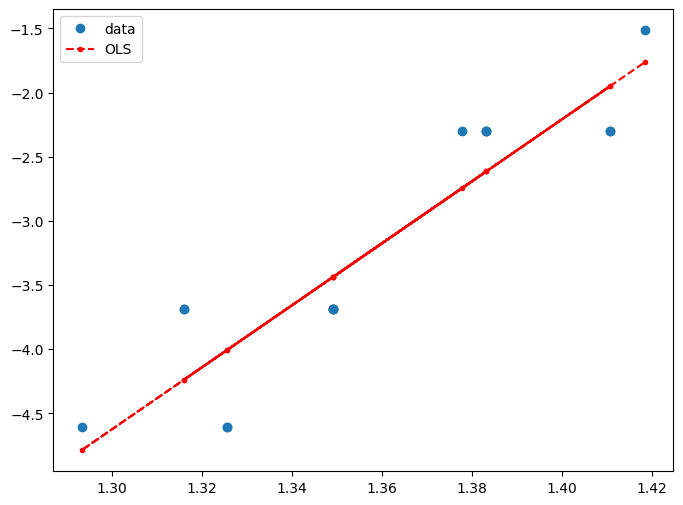

###################################


In [6]:
# 4.フレシェ分布のパラメータ-𝜖の推定
model.estimate_epsilon('OLS')

In [7]:
# 5.基準均衡時の内生変数をもとに、外生変数の推定
model.recover_fundamentals()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0043796328237053405
       x: [ 1.115e+00  8.062e-01  8.062e-01  1.260e+00  9.671e-01
            1.098e+00  1.098e+00  8.323e-01]
     nit: 14
     jac: [-3.212e-04  1.707e-04  1.707e-04  6.574e-05  3.423e-05
            3.050e-05  3.050e-05 -1.203e-04]
    nfev: 126
    njev: 14
### Check the estimation result ###
utility
[[3.24940268e+14 1.42824274e+14 1.42824274e+14 2.85015408e+14]
 [1.42824274e+14 3.24940268e+14 6.40104383e+13 6.30527674e+14]
 [1.42824274e+14 6.40104383e+13 3.24940268e+14 6.30527674e+14]
 [3.69981455e+13 8.07669475e+13 8.07669475e+13 7.62858640e+14]]
X_i
[1.11454318 0.80615106 0.80615106 1.25994229]
E_j
[0.96709211 1.09818186 1.09818186 0.83226931]
XE
[[1.07786591 1.2239711  1.2239711  0.92760008]
 [0.77962232 0.88530046 0.88530046 0.67093478]
 [0.77962232 0.88530046 0.88530046 0.67093478]
 [1.21848025 1.38364577 1.38364577 1.0486113 ]]
λ_ij
[[0.09240635 0.04612185 0.04612185 0.0

In [8]:
# 6.現況再現性の確認
model.check_replication('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [-2.369e-08  2.040e-08  2.040e-08  2.019e-09]
       x: [ 9.997e-01  1.002e+00  1.002e+00  1.099e+00]
  method: hybr
    nfev: 19
    fjac: [[-8.882e-01  3.214e-01  3.214e-01  6.686e-02]
           [-1.096e-01 -8.406e-01  5.026e-01  1.696e-01]
           [-3.326e-01 -2.919e-01 -7.344e-01  5.147e-01]
           [-2.974e-01 -3.238e-01 -3.238e-01 -8.378e-01]]
       r: [-3.092e+02  7.494e+01  7.494e+01  5.310e+01 -2.902e+02
            2.334e+02  6.214e+01 -1.725e+02  1.886e+02 -1.197e+02]
     qtf: [ 9.617e-07 -1.128e-07 -3.425e-07 -2.148e-07]
w_j: 賃金率
[0.9996707  1.00171966 1.00171966 1.09896814]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.0902966  0.04680994 0.04680994 0.06735547]
 [0.02995265 0.08027613 0.01586071 0.11239888]
 [0.02995265 0.01586071 0.08027613 0.11239888]
 [0.01144866 0.02950302 0.02950302 0.20129661]]
v_i

In [17]:
# 7.外生変数の再入力
model.change_exog({})

param['mu_cost'] = 0.045
model.set_param(param)

In [18]:
# 8.新しい外生変数による一般均衡分析と, 内生変数の導出
model.simulate_project('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [-4.522e-08  3.982e-08  3.982e-08 -3.468e-09]
       x: [ 9.990e-01  1.001e+00  1.001e+00  1.099e+00]
  method: hybr
    nfev: 19
    fjac: [[-8.951e-01  3.131e-01  3.131e-01  5.162e-02]
           [-1.151e-01 -8.473e-01  4.908e-01  1.675e-01]
           [-3.362e-01 -2.919e-01 -7.498e-01  4.894e-01]
           [-2.693e-01 -3.144e-01 -3.144e-01 -8.543e-01]]
       r: [-2.987e+02  8.242e+01  8.242e+01  5.170e+01 -2.919e+02
            2.307e+02  6.339e+01 -1.789e+02  1.852e+02 -1.277e+02]
     qtf: [ 6.475e-07 -9.512e-08 -2.779e-07 -9.794e-08]
w_j: 賃金率
[0.99902634 1.00111675 1.00111675 1.09860838]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.08994309 0.04693885 0.04693885 0.06752904]
 [0.03005146 0.08010338 0.01602566 0.11218215]
 [0.03005146 0.01602566 0.08010338 0.11218215]
 [0.01161694 0.0297635  0.0297635  0.20078093]]
v_i

In [19]:
# 9.一般均衡分析の結果の評価
model.evaluate_res()

In [20]:
# 評価結果の可視化
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.ticker as ticker
import matplotlib.patheffects as patheffects

# ダミーのポリゴンを作成
polygons = [
    Polygon([(0, 0), (1, 0), (1, -1), (0, -1)]),
    Polygon([(1, 0), (1, -1), (2, -1), (2, 0)]),
    Polygon([(0, -1), (1, -1), (1, -2), (0, -2)]),
    Polygon([(1, -1), (2, -1), (2, -2), (1, -2)])
]

# gdfに変換
gdf_change = gpd.GeoDataFrame(
    model.change,
    geometry = polygons
)
gdf_rep = gpd.GeoDataFrame(
    {
        k:((np.sum(v*model.rep['lambda_ij'], axis=1)/np.sum(model.rep['lambda_ij'], axis=1)) 
            if v.ndim == 2 else v) 
        for k,v in model.rep.items() 
    },
    geometry = polygons
)
gdf_res = gpd.GeoDataFrame(
    {
        k:((np.sum(v*model.res['lambda_ij'], axis=1)/np.sum(model.res['lambda_ij'], axis=1)) 
            if v.ndim == 2 else v) 
        for k,v in model.res.items() 
    },
    geometry = polygons
)
gdf_diff = gpd.GeoDataFrame(
    {
        k:((np.sum((model.res[k]-v)*model.rep['lambda_ij'], axis=1)/np.sum(model.rep['lambda_ij'], axis=1)) 
            if v.ndim == 2 else model.res[k]-v) 
        for k,v in model.rep.items() 
    },
    geometry = polygons
)

def plot_change(gdf:gpd.GeoDataFrame, name:str, dir:str):
    fig, ax = plt.subplots(1, 1)
    # カラーバーの上下端を設定
    norm = Normalize(vmin=-10, vmax=10)
    gdf.plot(
        column = name,
        ax = ax,
        norm = norm,
        cmap = 'seismic',
        legend = True,
        legend_kwds={
            "label": name, 
            "format":ticker.FuncFormatter(lambda x, _: f'{int(x)}%'),
            "anchor": (0.5,2.5),
            "orientation": "horizontal",
            "shrink": 0.6,
        }
    ).set_axis_off()

    # 数字を各ジオメトリに追加
    for idx, row in gdf.iterrows():
        # ジオメトリの中央にテキストを追加
        plt.text(
            row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(round(row[name],3)), 
            fontsize=25, 
            ha='center',
            path_effects=[patheffects.withStroke(
                linewidth=3, 
                foreground='white', 
                capstyle="round"
                )]
        )

    # 保存
    # fig.subplots_adjust(left=0.05, right=0.995, bottom=0.05, top=0.995)
    plt.savefig(f"{dir}/{name}_change.png",bbox_inches="tight")
    # 可視化
    plt.show()

def plot_value(gdf:gpd.GeoDataFrame, name:str, dir:str):
    fig, ax = plt.subplots(1, 1)
    # カラーバーの上下端を設定
    top = max(abs(gdf[name]))*1.5
    if min(gdf[name]) < 0 :
        norm = Normalize(vmin=-top, vmax=top)
        cmap = 'seismic'
    else: 
        norm = Normalize(vmin=0, vmax=top)
        cmap = 'Reds'
    gdf.plot(
        column = name,
        ax = ax,
        norm = norm,
        cmap = cmap,
        legend = True,
        legend_kwds={
            "label": name, 
            "format":ticker.FuncFormatter(lambda x, _: f'{int(x)}'),
            "anchor": (0.5,2.5),
            "orientation": "horizontal",
            "shrink": 0.6,
        }
    ).set_axis_off()

    # 数字を各ジオメトリに追加
    for idx, row in gdf.iterrows():
        # ジオメトリの中央にテキストを追加
        plt.text(
            row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(round(row[name],3)), 
            fontsize=25, 
            ha='center',
            path_effects=[patheffects.withStroke(
                linewidth=3, 
                foreground='white', 
                capstyle="round"
                )]
        )

    # 保存
    # fig.subplots_adjust(left=0.05, right=0.995, bottom=0.05, top=0.995)
    plt.savefig(f"{dir}/{name}_value.png",bbox_inches="tight")
    # 可視化
    plt.show()

In [21]:
gdf_change.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,-0.064457,0.258245,0.258245,-0.056779,-1.146366,0.030992,1.102226,1.133667,0.030992,0.007660,0.024675,-0.001912,0.323091,0.350220,-0.323777,0.120402,-0.066368,0.193459,-0.458432,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,-0.060188,0.241114,0.241114,-0.049791,-1.127566,-0.052715,1.090078,1.036935,-0.052715,0.221278,-0.056418,0.213064,0.316725,0.254053,-0.088153,0.129757,0.152748,0.207584,-0.491224,"POLYGON ((1.00000 0.00000, 1.00000 -1.00000, 2..."
2,-0.060188,0.241114,0.241114,-0.049791,-1.127566,-0.052715,1.090078,1.036935,-0.052715,0.221278,-0.056418,0.213064,0.316725,0.254053,-0.088153,0.129757,0.152748,0.207584,-0.491224,"POLYGON ((0.00000 -1.00000, 1.00000 -1.00000, ..."
3,-0.032737,0.131054,0.131054,-0.041505,-1.056520,0.063869,1.025877,1.090822,0.063869,-0.157173,0.055177,-0.159991,0.403204,0.440981,-0.323306,0.013324,-0.192675,0.039489,-0.105065,"POLYGON ((1.00000 -1.00000, 2.00000 -1.00000, ..."


In [22]:
gdf_rep.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.999671,1.501977,1.001318,2.773004,0.427432,0.067945,0.999797,25.122098,25.127195,16.165057,26.691223,17.371030,0.222325,5.586407,2.890408,8.476815,21.706637,1.172032,0.208008,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,1.001720,1.489726,0.993151,2.858116,0.435127,0.084811,1.001655,23.888313,23.848837,17.244979,25.461298,18.468978,0.228233,5.443086,3.104721,8.547807,23.125923,1.173516,0.208955,"POLYGON ((1.00000 0.00000, 1.00000 -1.00000, 2..."
2,1.001720,1.489726,0.993151,2.858116,0.435127,0.084811,1.001655,23.888313,23.848837,17.244979,25.461298,18.468978,0.228233,5.443086,3.104721,8.547807,23.125923,1.173516,0.208955,"POLYGON ((0.00000 -1.00000, 1.00000 -1.00000, ..."
3,1.098968,2.007522,1.204513,3.004597,0.470911,0.155997,0.998936,27.146203,27.175130,49.344985,29.384904,52.689738,0.208870,5.676083,7.210923,12.887005,72.380430,1.653837,0.112548,"POLYGON ((1.00000 -1.00000, 2.00000 -1.00000, ..."


In [23]:
gdf_res.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.999026,1.505856,1.003904,2.771281,0.422519,0.067859,1.010818,25.406899,25.134983,16.166295,26.697809,17.370697,0.223035,5.605972,2.881049,8.487021,21.692230,1.174299,0.207054,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,1.001117,1.493318,0.995545,2.856334,0.430188,0.084582,1.012576,24.136019,23.836265,17.283139,25.446934,18.508329,0.228933,5.456914,3.101984,8.558898,23.161248,1.175952,0.207928,"POLYGON ((1.00000 0.00000, 1.00000 -1.00000, 2..."
2,1.001117,1.493318,0.995545,2.856334,0.430188,0.084582,1.012576,24.136019,23.836265,17.283139,25.446934,18.508329,0.228933,5.456914,3.101984,8.558898,23.161248,1.175952,0.207928,"POLYGON ((0.00000 -1.00000, 1.00000 -1.00000, ..."
3,1.098608,2.010153,1.206092,3.002251,0.465834,0.155262,1.009188,27.442320,27.192487,49.267428,29.401118,52.605439,0.209658,5.701113,7.187609,12.888723,72.240971,1.654490,0.112430,"POLYGON ((1.00000 -1.00000, 2.00000 -1.00000, ..."


In [24]:
gdf_diff

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,-0.000644,0.003879,0.002586,-0.001572,-0.004899,-0.000032,0.011020,0.284801,0.007787,0.001238,0.006586,-0.000332,0.000718,0.019565,-0.009358,0.010206,-0.014406,0.002267,-0.000954,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,-0.000603,0.003592,0.002395,-0.001408,-0.004901,-0.000137,0.010919,0.247706,-0.012572,0.038159,-0.014365,0.039351,0.000721,0.013828,-0.002737,0.011091,0.035324,0.002436,-0.001026,"POLYGON ((1.00000 0.00000, 1.00000 -1.00000, 2..."
2,-0.000603,0.003592,0.002395,-0.001408,-0.004901,-0.000137,0.010919,0.247706,-0.012572,0.038159,-0.014365,0.039351,0.000721,0.013828,-0.002737,0.011091,0.035324,0.002436,-0.001026,"POLYGON ((0.00000 -1.00000, 1.00000 -1.00000, ..."
3,-0.000360,0.002631,0.001579,-0.001219,-0.004964,-0.000318,0.010248,0.296117,0.017356,-0.077557,0.016214,-0.084299,0.000838,0.025030,-0.023313,0.001717,-0.139459,0.000653,-0.000118,"POLYGON ((1.00000 -1.00000, 2.00000 -1.00000, ..."


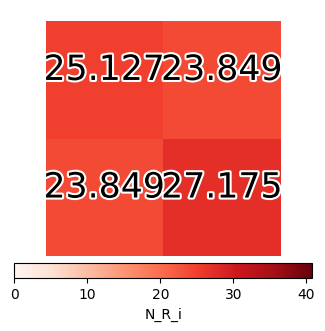

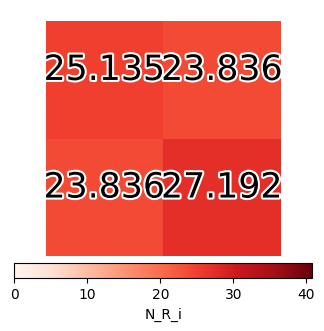

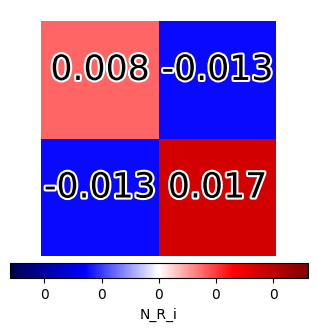

In [25]:
plot_value(gdf_rep, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area4_4')
plot_value(gdf_res, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area4_4')
plot_value(gdf_diff, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images/area4_4')

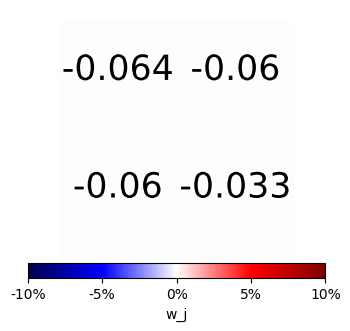

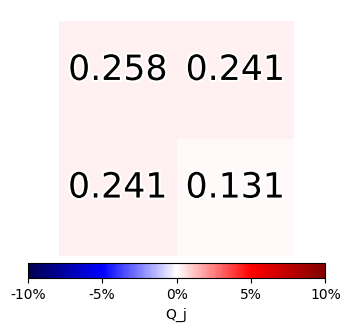

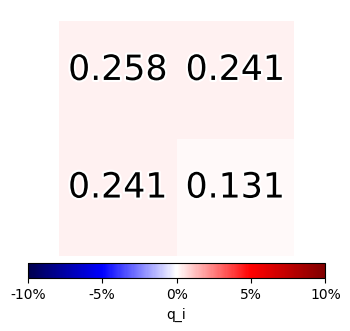

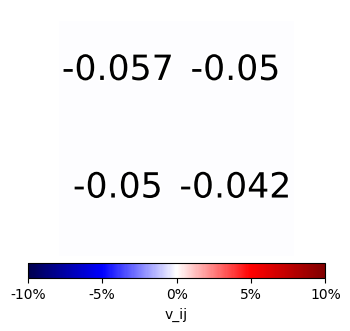

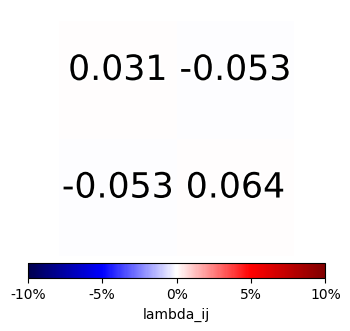

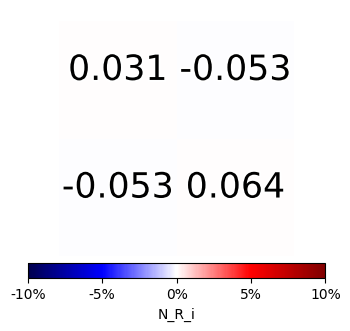

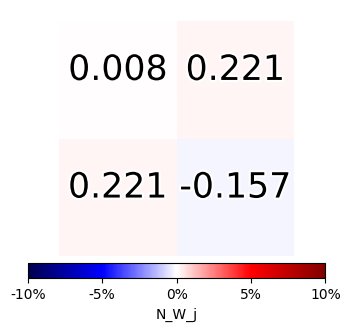

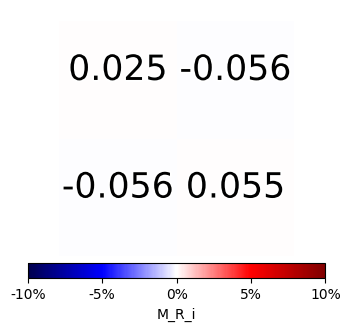

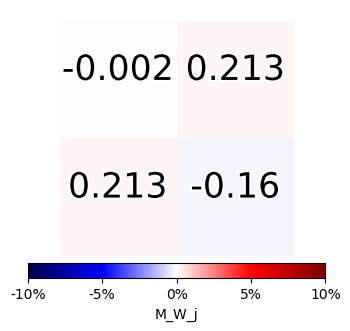

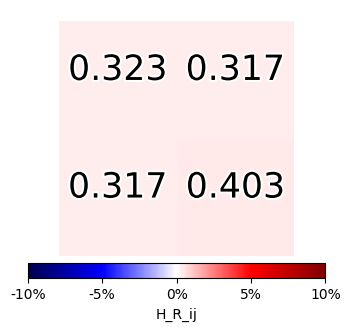

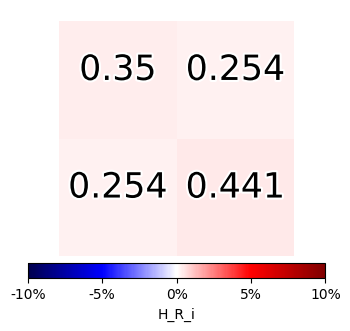

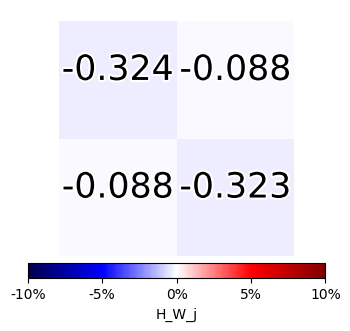

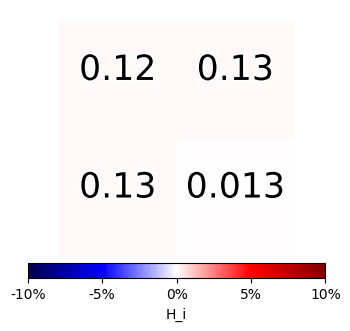

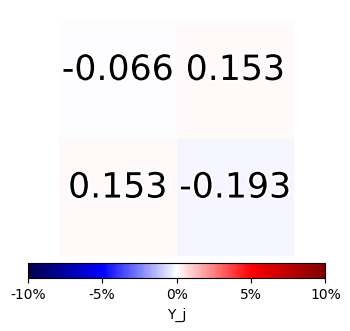

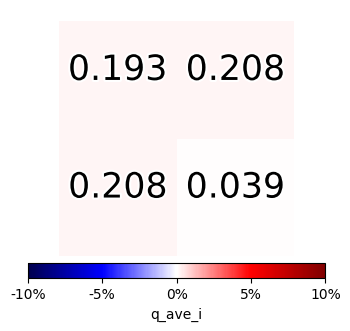

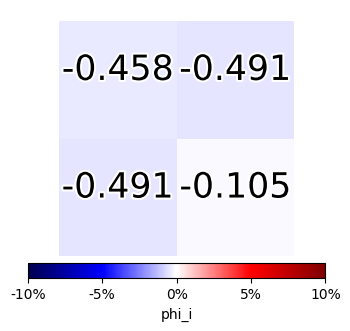

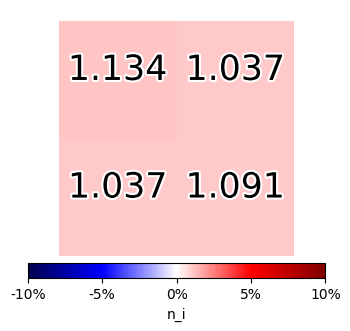

In [30]:
path = '/Users/nagampere/File/horkew/analysis/master_thesis/images/area4_4'
plot_change(gdf_change, 'w_j', path)
plot_change(gdf_change, 'Q_j', path)
plot_change(gdf_change, 'q_i', path)
plot_change(gdf_change, 'v_ij', path)
plot_change(gdf_change, 'lambda_ij', path)
plot_change(gdf_change, 'N_R_i', path)
plot_change(gdf_change, 'N_W_j', path)
plot_change(gdf_change, 'M_R_i', path)
plot_change(gdf_change, 'M_W_j', path)
plot_change(gdf_change, 'H_R_ij', path)
plot_change(gdf_change, 'H_R_i', path)
plot_change(gdf_change, 'H_W_j', path)
plot_change(gdf_change, 'H_i', path)
plot_change(gdf_change, 'Y_j', path)
plot_change(gdf_change, 'q_ave_i', path)
plot_change(gdf_change, 'phi_i', path)
plot_change(gdf_change, 'n_i', path)

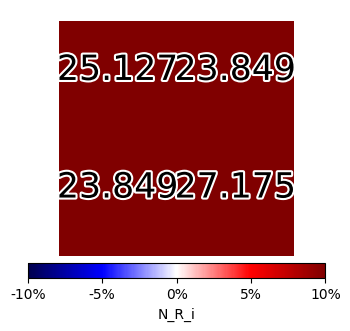

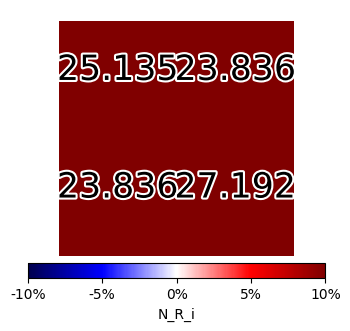

In [27]:
plot_change(gdf_rep, 'N_R_i', path)
plot_change(gdf_res, 'N_R_i', path)

In [40]:
print(np.round(model.exog['delta_ij'],3))

[[0.408 0.416 0.416 0.409]
 [0.416 0.408 0.424 0.402]
 [0.416 0.424 0.408 0.402]
 [0.445 0.436 0.436 0.412]]


In [41]:
print(np.round(9/24*model.rep['v_ij'],3))
print(np.round(9/24*model.res['v_ij'],3))

[[1.063 1.008 1.008 1.053]
 [1.006 1.066 0.953 1.111]
 [1.006 0.953 1.066 1.111]
 [0.951 1.008 1.008 1.172]]
[[1.055 1.011 1.011 1.109]
 [0.998 1.069 0.957 1.109]
 [0.998 0.957 1.069 1.109]
 [0.998 1.011 1.011 1.17 ]]


In [28]:
print(np.round(model.rep['n_ij'],3))
print(np.round(model.res['n_ij'],3))

[[1.    1.    1.    0.999]
 [1.002 1.002 1.002 1.001]
 [1.002 1.002 1.002 1.001]
 [0.999 1.    1.    0.999]]
[[1.01  1.012 1.012 1.01 ]
 [1.013 1.013 1.014 1.012]
 [1.013 1.014 1.013 1.012]
 [1.01  1.011 1.011 1.009]]


In [23]:
print(np.round(model.rep['mu_ij'],3))
print(np.round(model.res['mu_ij'],3))

[[0.404 0.415]
 [0.404 0.455]]
[[0.404 0.42 ]
 [0.415 0.465]]


In [29]:
print(np.round(model.rep['n_i'],2))
print(np.round(model.res['n_i'],2))

[25.12 23.89 23.89 27.15]
[25.41 24.14 24.14 27.44]


In [42]:
print(np.round(np.sum(model.rep['n_i']),2))
print(np.round(np.sum(model.res['n_i']),2))

100.04
100.25
